# 📊 LinkedIn Job Market Skill Analysis – Data Analyst Role

## 🔍 Objective
This project aims to analyze Data Analyst job postings from LinkedIn to identify:

- Most in-demand **technical and soft skills**
- Commonly used **keywords** in job descriptions
- Frequently mentioned **educational qualifications**
- Patterns in **job titles** and skill trends

By extracting and visualizing this data, we can understand what employers are currently looking for in a Data Analyst, helping job seekers align their profiles accordingly.

---

## 🧰 Tools Used
- **Python** (Pandas, Matplotlib, Regex, Seaborn)
- **Jupyter Notebook**
- **Data Source**: Manually downloaded CSV from LinkedIn job posts

---

## 💡 Why This Matters
With job market competition rising, knowing which skills and qualifications to showcase can make or break a job application. This analysis offers a data-driven view to enhance your resume, LinkedIn profile, and interview preparation.

In [8]:
df.shape
df.columns
df.head()
df['Job Title'].value_counts().head(10)  # Most common job titles

Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Quality Analyst        17
Data Analyst II             17
Data Analyst Junior         17
Data Governance Analyst     16
Lead Data Analyst           15
Name: count, dtype: int64

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
df = pd.read_csv("C:/Users/Yashwant Singh/Downloads/DataAnalyst.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & digits
    return text

df['cleaned_description'] = df['Job Description'].apply(clean_text)
df[['Job Title', 'cleaned_description']].head()


,Job Title,cleaned_description
0,"Data Analyst, Center on Immigration and Justic...",are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,overview\n\nprovides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",were looking for a senior data analyst who has...
3,Data Analyst,requisition numberrr\nremoteyes\nwe collaborat...
4,Reporting Data Analyst,about fanduel group\n\nfanduel group is a worl...


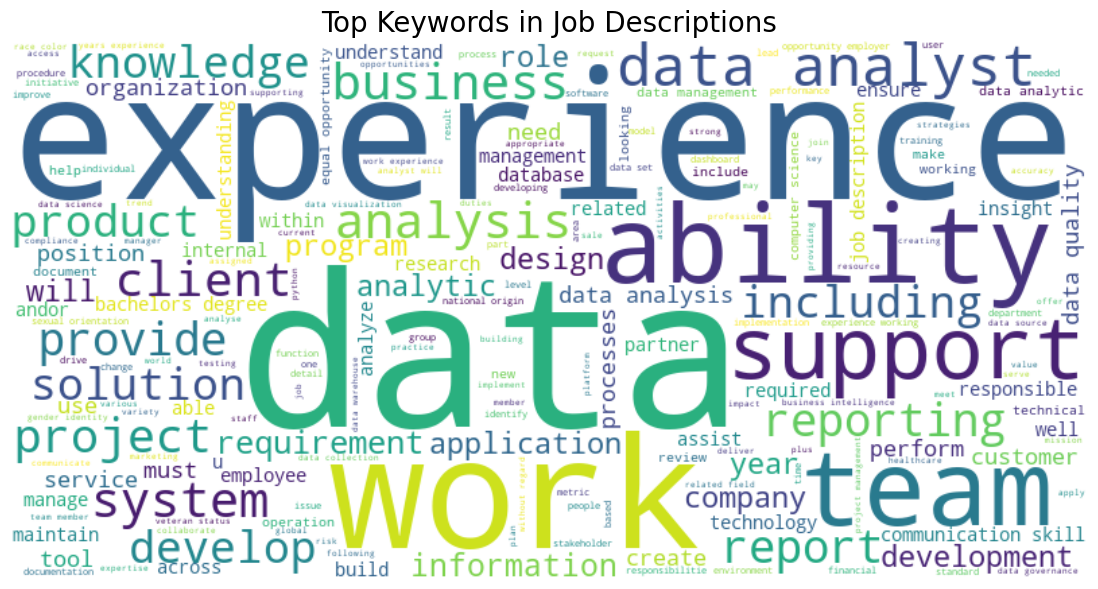

In [6]:
text = ' '.join(df['cleaned_description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Keywords in Job Descriptions", fontsize=20)
plt.show()


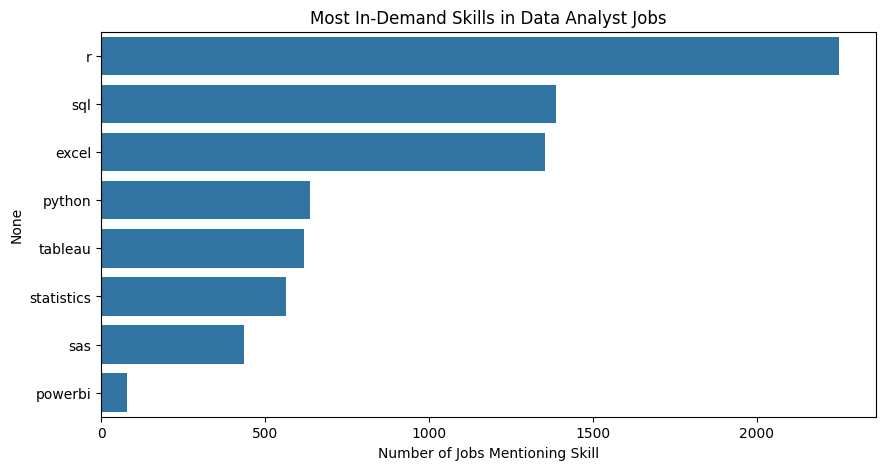

In [7]:
skills = ['python', 'sql', 'excel', 'powerbi', 'tableau', 'r', 'sas', 'statistics']

# Add 1/0 columns based on skill presence
for skill in skills:
    df[skill] = df['cleaned_description'].apply(lambda x: 1 if skill in x else 0)

# Count frequency of each skill
skill_counts = df[skills].sum().sort_values(ascending=False)

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=skill_counts.values, y=skill_counts.index)
plt.title('Most In-Demand Skills in Data Analyst Jobs')
plt.xlabel('Number of Jobs Mentioning Skill')
plt.show()


**Insight**: R, SQL, Excel, and Python are most commonly required for Data Analyst roles. Surprisingly, Tableau also appear frequently.

**Observation**: Employers frequently look for experience, data, teamwork, and strong communication—soft skills matter too!

<Axes: title={'center': 'Education Mentioned in Job Descriptions'}, ylabel='% of Jobs'>

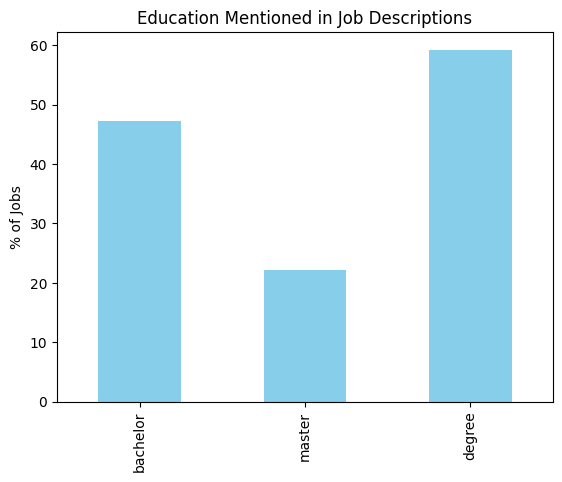

In [9]:
# Flags for education mentions
df['bachelor'] = df['cleaned_description'].str.contains('bachelor', case=False, na=False)
df['master'] = df['cleaned_description'].str.contains('master', case=False, na=False)
df['degree'] = df['cleaned_description'].str.contains('degree', case=False, na=False)

# Count percentage of jobs mentioning them
education_stats = df[['bachelor', 'master', 'degree']].mean() * 100
education_stats.plot(kind='bar', title='Education Mentioned in Job Descriptions', ylabel='% of Jobs', color='skyblue')

<Axes: title={'center': 'Jobs Mentioning Experience Requirement'}, xlabel='mentions_experience', ylabel='Count'>

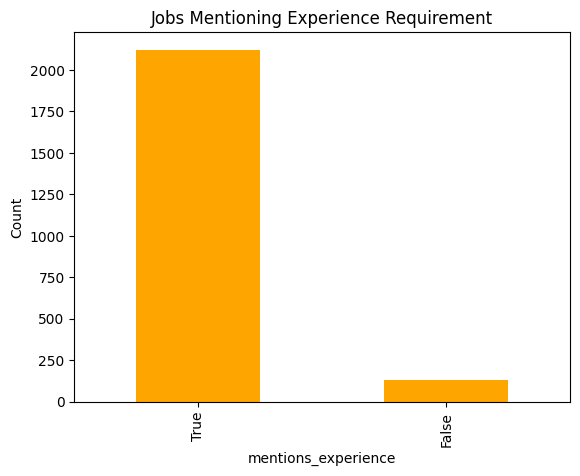

In [12]:
df['mentions_experience'] = df['cleaned_description'].str.contains('experience', case=False, na=False)
df['mentions_experience'].value_counts().plot(kind='bar', title='Jobs Mentioning Experience Requirement', color='orange', ylabel='Count')

In [10]:
df.to_csv("cleaned_dataanalyst_jobs.csv", index=False)

# ✅ Conclusion

Based on our analysis of Data Analyst job postings:

- **SQL, Python, Excel, and Tableau** are the most in-demand technical skills.
- Job descriptions frequently emphasize skills such as **communication**, **problem-solving**, and **data visualization**.
- **Bachelor’s degree** (often in Computer Science, Statistics, or similar fields) is commonly required.
- Most job titles contain clear indicators like *“Data Analyst”*, *“Business Analyst”*, or *“Insights Analyst”*.

This project not only helps understand the job market but also prepares you to:

- Tailor your **resume and LinkedIn** profiles
- Prioritize **learning specific tools** and skills
- Understand recruiter language and expectations

---

### 🚀 Next Steps
- Expand this analysis to include job locations, salary ranges, or remote vs on-site trends.
- Compare trends across time or between different roles like *Data Scientist* or *BI Analyst*.

---

Thank you for reviewing this analysis!  
_Your feedback is welcome. Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/yashwantsingh01)._
